In [4]:
# import data

import re
import pandas as pd
import numpy as np
import sqlite3

# read database, change path and database name if needed
conn = sqlite3.connect('final_db_2.db')
cursor = conn.cursor()
result = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

In [5]:
# find table names - match data
table_names = sorted(list(zip(*result))[0])

# create first table
test_name = table_names[0]
data = pd.read_sql("SELECT * FROM '{}'".format(test_name), conn)

# append all match stats to one table
for name in table_names[1:]:
    data_i = pd.read_sql("SELECT * FROM '{}'".format(name), conn)
    data = pd.concat([data, data_i])

In [6]:
data2 = data[['Team_name_home', 'Round_home', 'Team_name_away', 'Year_away', 'Round_away', 
                            'Results_away', 'Round_diff', 'Year_diff', 'Team_name_diff' ]]

In [7]:
data = data.drop(columns = ['Team_name_home', 'Round_home', 'Team_name_away', 'Year_away', 'Round_away', 
                            'Results_away', 'Round_diff', 'Year_diff', 'Team_name_diff' ]) 
# only need result home 

In [8]:
data[data.isna().any(axis=1)]

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_3_Points_lost_diff,Last_5_Points_diff,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away
687,55.0,76.0,13.0,4.0,-0.12,45.0,5.0,55.0,31.0,69.0,...,-12.0,3.0,1.0,-1.0,3.0,-3.0,24.0,-12.0,0.50,0.00
695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.0,4.0,2.0,-2.0,4.0,-4.0,15.0,-25.0,0.56,0.11
916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-14.0,17.0,0.00,0.50
921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-20.0,17.0,0.00,0.50
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,-3.0,-1.0,1.0,-3.0,3.0,-13.0,6.0,0.33,0.67
1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-88.0,-3.0,-1.0,0.0,-3.0,-1.0,-98.0,-88.0,0.00,0.50
1298,69.0,104.0,16.0,3.0,-0.12,81.0,5.0,49.0,25.0,108.0,...,8.0,1.0,0.0,0.0,1.0,0.0,13.0,8.0,0.17,0.00
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,3.0,1.0,-1.0,2.0,-2.0,9.0,-3.0,0.50,0.00
1459,72.0,107.0,26.0,8.0,-14.00,76.0,5.0,47.0,19.0,103.0,...,-13.0,1.0,1.0,-1.0,1.0,-1.0,-8.0,-13.0,0.33,0.17
1460,85.0,104.0,19.0,9.0,-4.00,97.0,6.0,40.0,13.0,136.0,...,-7.0,0.0,0.0,0.0,0.0,0.0,-9.0,-7.0,0.33,0.33


In [9]:
data = data.dropna()
# check missing values for each of the variables
data.isnull().sum()

AVG_1_Points_home           0
AVG_1_Serve_number_home     0
AVG_1_Serve_errors_home     0
AVG_1_Serve_aces_home       0
AVG_1_Serve_%_effic_home    0
                           ..
Last_5_Sets_lost_diff       0
Last_5_Points_won_diff      0
Last_5_Points_lost_diff     0
%_points_poss_home          0
%_points_poss_away          0
Length: 278, dtype: int64

In [10]:
# define columns' names
new_col2 = ['AVG_1_Points_home',
 'AVG_1_Serve_number_home',
 'AVG_1_Serve_errors_home',
 'AVG_1_Serve_aces_home',
 'AVG_1_Serve_%_effic_home',
 'AVG_1_Rec_number_home',
 'AVG_1_Rec_errors_home',
 'AVG_1_Rec_%_pos_home',
 'AVG_1_Rec_%_perf_home',
 'AVG_1_Atack_number_home',
 'AVG_1_Atack_error_home',
 'AVG_1_Atack_blocked_home',
 'AVG_1_Atack_%_eff_home',
 'AVG_1_Block_points_home',
 'AVG_1_Points_net_home',
 'AVG_3_Points_home',
 'AVG_3_Serve_number_home',
 'AVG_3_Serve_errors_home',
 'AVG_3_Serve_aces_home',
 'AVG_3_Serve_%_effic_home',
 'AVG_3_Rec_number_home',
 'AVG_3_Rec_errors_home',
 'AVG_3_Rec_%_pos_home',
 'AVG_3_Rec_%_perf_home',
 'AVG_3_Atack_number_home',
 'AVG_3_Atack_error_home',
 'AVG_3_Atack_blocked_home',
 'AVG_3_Atack_%_eff_home',
 'AVG_3_Block_points_home',
 'AVG_3_Points_net_home',
 'AVG_5_Points_home',
 'AVG_5_Serve_number_home',
 'AVG_5_Serve_errors_home',
 'AVG_5_Serve_aces_home',
 'AVG_5_Serve_%_effic_home',
 'AVG_5_Rec_number_home',
 'AVG_5_Rec_errors_home',
 'AVG_5_Rec_%_pos_home',
 'AVG_5_Rec_%_perf_home',
 'AVG_5_Atack_number_home',
 'AVG_5_Atack_error_home',
 'AVG_5_Atack_blocked_home',
 'AVG_5_Atack_%_eff_home',
 'AVG_5_Block_points_home',
 'AVG_5_Points_net_home',
 'Height_avg_home',
 'Weight_avg_home',
 'Range_avg_home',
 'Opposite_Height_home',
 'Libero_Height_home',
 'Outside_Height_home',
 'Setter_Height_home',
 'Middle_Height_home',
 'Opposite_Weight_home',
 'Libero_Weight_home',
 'Outside_Weight_home',
 'Setter_Weight_home',
 'Middle_Weight_home',
 'Opposite_Range_home',
 'Libero_Range_home',
 'Outside_Range_home',
 'Setter_Range_home',
 'Middle_Range_home',
 'Points_home',
 'Matches_won_home',
 'Matches_lost_home',
 'Sets_won_home',
 'Sets_lost_home',
 'Points_won_home',
 'Points_lost_home',
 'Last_1_Points_home',
 'Last_1_Matches_won_home',
 'Last_1_Matches_lost_home',
 'Last_1_Sets_won_home',
 'Last_1_Sets_lost_home',
 'Last_1_Points_won_home',
 'Last_1_Points_lost_home',
 'Last_3_Points_home',
 'Last_3_Matches_won_home',
 'Last_3_Matches_lost_home',
 'Last_3_Sets_won_home',
 'Last_3_Sets_lost_home',
 'Last_3_Points_won_home',
 'Last_3_Points_lost_home',
 'Last_5_Points_home',
 'Last_5_Matches_won_home',
 'Last_5_Matches_lost_home',
 'Last_5_Sets_won_home',
 'Last_5_Sets_lost_home',
 'Last_5_Points_won_home',
 'Last_5_Points_lost_home',
 'ID',
 'Year_home',
 'Results_home',
 'AVG_1_Points_away',
 'AVG_1_Serve_number_away',
 'AVG_1_Serve_errors_away',
 'AVG_1_Serve_aces_away',
 'AVG_1_Serve_%_effic_away',
 'AVG_1_Rec_number_away',
 'AVG_1_Rec_errors_away',
 'AVG_1_Rec_%_pos_away',
 'AVG_1_Rec_%_perf_away',
 'AVG_1_Atack_number_away',
 'AVG_1_Atack_error_away',
 'AVG_1_Atack_blocked_away',
 'AVG_1_Atack_%_eff_away',
 'AVG_1_Block_points_away',
 'AVG_1_Points_net_away',
 'AVG_3_Points_away',
 'AVG_3_Serve_number_away',
 'AVG_3_Serve_errors_away',
 'AVG_3_Serve_aces_away',
 'AVG_3_Serve_%_effic_away',
 'AVG_3_Rec_number_away',
 'AVG_3_Rec_errors_away',
 'AVG_3_Rec_%_pos_away',
 'AVG_3_Rec_%_perf_away',
 'AVG_3_Atack_number_away',
 'AVG_3_Atack_error_away',
 'AVG_3_Atack_blocked_away',
 'AVG_3_Atack_%_eff_away',
 'AVG_3_Block_points_away',
 'AVG_3_Points_net_away',
 'AVG_5_Points_away',
 'AVG_5_Serve_number_away',
 'AVG_5_Serve_errors_away',
 'AVG_5_Serve_aces_away',
 'AVG_5_Serve_%_effic_away',
 'AVG_5_Rec_number_away',
 'AVG_5_Rec_errors_away',
 'AVG_5_Rec_%_pos_away',
 'AVG_5_Rec_%_perf_away',
 'AVG_5_Atack_number_away',
 'AVG_5_Atack_error_away',
 'AVG_5_Atack_blocked_away',
 'AVG_5_Atack_%_eff_away',
 'AVG_5_Block_points_away',
 'AVG_5_Points_net_away',
 'Height_avg_away',
 'Weight_avg_away',
 'Range_avg_away',
 'Opposite_Height_away',
 'Libero_Height_away',
 'Outside_Height_away',
 'Setter_Height_away',
 'Middle_Height_away',
 'Opposite_Weight_away',
 'Libero_Weight_away',
 'Outside_Weight_away',
 'Setter_Weight_away',
 'Middle_Weight_away',
 'Opposite_Range_away',
 'Libero_Range_away',
 'Outside_Range_away',
 'Setter_Range_away',
 'Middle_Range_away',
 'Points_away',
 'Matches_won_away',
 'Matches_lost_away',
 'Sets_won_away',
 'Sets_lost_away',
 'Points_won_away',
 'Points_lost_away',
 'Last_1_Points_away',
 'Last_1_Matches_won_away',
 'Last_1_Matches_lost_away',
 'Last_1_Sets_won_away',
 'Last_1_Sets_lost_away',
 'Last_1_Points_won_away',
 'Last_1_Points_lost_away',
 'Last_3_Points_away',
 'Last_3_Matches_won_away',
 'Last_3_Matches_lost_away',
 'Last_3_Sets_won_away',
 'Last_3_Sets_lost_away',
 'Last_3_Points_won_away',
 'Last_3_Points_lost_away',
 'Last_5_Points_away',
 'Last_5_Matches_won_away',
 'Last_5_Matches_lost_away',
 'Last_5_Sets_won_away',
 'Last_5_Sets_lost_away',
 'Last_5_Points_won_away',
 'Last_5_Points_lost_away',
 'AVG_1_Points_diff',
 'AVG_1_Serve_number_diff',
 'AVG_1_Serve_errors_diff',
 'AVG_1_Serve_aces_diff',
 'AVG_1_Serve_%_effic_diff',
 'AVG_1_Rec_number_diff',
 'AVG_1_Rec_errors_diff',
 'AVG_1_Rec_%_pos_diff',
 'AVG_1_Rec_%_perf_diff',
 'AVG_1_Atack_number_diff',
 'AVG_1_Atack_error_diff',
 'AVG_1_Atack_blocked_diff',
 'AVG_1_Atack_%_eff_diff',
 'AVG_1_Block_points_diff',
 'AVG_1_Points_net_diff',
 'AVG_3_Points_diff',
 'AVG_3_Serve_number_diff',
 'AVG_3_Serve_errors_diff',
 'AVG_3_Serve_aces_diff',
 'AVG_3_Serve_%_effic_diff',
 'AVG_3_Rec_number_diff',
 'AVG_3_Rec_errors_diff',
 'AVG_3_Rec_%_pos_diff',
 'AVG_3_Rec_%_perf_diff',
 'AVG_3_Atack_number_diff',
 'AVG_3_Atack_error_diff',
 'AVG_3_Atack_blocked_diff',
 'AVG_3_Atack_%_eff_diff',
 'AVG_3_Block_points_diff',
 'AVG_3_Points_net_diff',
 'AVG_5_Points_diff',
 'AVG_5_Serve_number_diff',
 'AVG_5_Serve_errors_diff',
 'AVG_5_Serve_aces_diff',
 'AVG_5_Serve_%_effic_diff',
 'AVG_5_Rec_number_diff',
 'AVG_5_Rec_errors_diff',
 'AVG_5_Rec_%_pos_diff',
 'AVG_5_Rec_%_perf_diff',
 'AVG_5_Atack_number_diff',
 'AVG_5_Atack_error_diff',
 'AVG_5_Atack_blocked_diff',
 'AVG_5_Atack_%_eff_diff',
 'AVG_5_Block_points_diff',
 'AVG_5_Points_net_diff',
 'Height_avg_diff',
 'Weight_avg_diff',
 'Range_avg_diff',
 'Opposite_Height_diff',
 'Libero_Height_diff',
 'Outside_Height_diff',
 'Setter_Height_diff',
 'Middle_Height_diff',
 'Opposite_Weight_diff',
 'Libero_Weight_diff',
 'Outside_Weight_diff',
 'Setter_Weight_diff',
 'Middle_Weight_diff',
 'Opposite_Range_diff',
 'Libero_Range_diff',
 'Outside_Range_diff',
 'Setter_Range_diff',
 'Middle_Range_diff',
 'Points_diff',
 'Matches_won_diff',
 'Matches_lost_diff',
 'Sets_won_diff',
 'Sets_lost_diff',
 'Points_won_diff',
 'Points_lost_diff',
 'Last_1_Points_diff',
 'Last_1_Matches_won_diff',
 'Last_1_Matches_lost_diff',
 'Last_1_Sets_won_diff',
 'Last_1_Sets_lost_diff',
 'Last_1_Points_won_diff',
 'Last_1_Points_lost_diff',
 'Last_3_Points_diff',
 'Last_3_Matches_won_diff',
 'Last_3_Matches_lost_diff',
 'Last_3_Sets_won_diff',
 'Last_3_Sets_lost_diff',
 'Last_3_Points_won_diff',
 'Last_3_Points_lost_diff',
 'Last_5_Points_diff',
 'Last_5_Matches_won_diff',
 'Last_5_Matches_lost_diff',
 'Last_5_Sets_won_diff',
 'Last_5_Sets_lost_diff',
 'Last_5_Points_won_diff',
 'Last_5_Points_lost_diff',
 '%_points_poss_home',
 '%_points_poss_away',
 '%_points_poss_diff']

In [11]:
data['%_points_poss_diff'] = data['%_points_poss_home'] - data['%_points_poss_away']

In [12]:
data.columns = new_col2

In [13]:
# define column with the result
df1 = data.pop('Results_home') 
data['Result']=df1 

In [14]:
in_sample = data[data['Year_home'].isin(['2020/2021', '2019/2020', '2018/2019', '2017/2018', '2016/2017', '2015/2016', '2014/2015', '2013/2014', 
        '2012/2013', '2011/2012', '2010/2011'])]

In [15]:
labels = in_sample.pop('Result')

In [16]:
in_sample = in_sample.drop(columns=['ID', 'Year_home'])

In [17]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(in_sample, labels, test_size = 0.3, random_state = 30)

In [18]:
out_of_time = data[data['Year_home'] == ('2021/2022')]

In [19]:
y_oot = out_of_time['Result']

In [20]:
X_oot = out_of_time.drop(columns=['ID', 'Result', 'Year_home'])

### Read data

In [21]:
bets = pd.read_csv('bets2.csv', sep = ';')

In [22]:
bets

,Unnamed: 0,Team_name_home,Round_home,Team_name_away,Home,Away
0,1634,Suwałki,2,Lublin,1.22,4.02
1,1635,Gdańsk,2,Aluron,2.60,1.50
2,1636,GKS,2,Asseco,6.35,1.12
3,1637,Skra,2,Indykpol,1.20,4.60
4,1638,Warsza,2,Lubin,1.10,7.10
...,...,...,...,...,...,...
170,1804,Gdańsk,26,Indykpol,1.32,3.40
171,1805,Asseco,26,Lubin,1.07,8.50
172,1806,Skra,26,Czarni,1.15,5.55
173,1807,Warsza,26,Nysa,1.45,2.80


## Generate predictions

### XGBoost

In [23]:
# import XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# final model
xgb_model = XGBClassifier(colsample_bytree=0.5,learning_rate=0.01, max_depth= 5, min_child_weight=1,
 n_estimators=200, objective='binary:logistic', subsample= 0.1)
xgb_model.fit(X_train, y_train, verbose=True)

# calculate predictions
y_train_pred = xgb_model.predict_proba(X_train)[:,1]
y_test_pred = xgb_model.predict_proba(X_test)[:,1]

# print scores on training and testing set
print('Training set accuracy: {:.4f}'.format(xgb_model.score(X_train, y_train)))
print('Training set AUC: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
print('Test set accuracy: {:.4f}'.format(xgb_model.score(X_test, y_test)))
print('Test set AUC: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))

y_oot_pred = xgb_model.predict_proba(X_oot)[:,1]

print('Out of time accuracy: {:.4f}'.format(xgb_model.score(X_oot, y_oot)))
print('Out of time set AUC: {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred)))

predictions_test = xgb_model.predict(X_test)
predictions_oot_xgb = xgb_model.predict(X_oot)
predictions_oot_xgb = pd.Series(predictions_oot_xgb)

Training set accuracy: 0.7676
Training set AUC: 0.8575
Test set accuracy: 0.7295
Test set AUC: 0.7837
Out of time accuracy: 0.7257
Out of time set AUC: 0.7575


In [24]:
from sklearn import metrics

y_is_result = xgb_model.predict(X_train)
y_oos_result = xgb_model.predict(X_test)
y_oot_result = xgb_model.predict(X_oot)

print('In sample precision: {:.4f}'.format(metrics.precision_score(y_train, y_is_result)))
print('In sample set recall: {:.4f}'.format(metrics.recall_score(y_train, y_is_result)))
print('In sample f1 score: {:.4f}'.format(metrics.f1_score(y_train, y_is_result)))

print('Out of sample precision: {:.4f}'.format(metrics.precision_score(y_test, y_oos_result)))
print('Out of sample set recall: {:.4f}'.format(metrics.recall_score(y_test, y_oos_result)))
print('Out of sample f1 score: {:.4f}'.format(metrics.f1_score(y_test, y_oos_result)))


print('Out of time precision: {:.4f}'.format(metrics.precision_score(y_oot, y_oot_result)))
print('Out of time set recall: {:.4f}'.format(metrics.recall_score(y_oot, y_oot_result)))
print('Out of time f1 score: {:.4f}'.format(metrics.f1_score(y_oot, y_oot_result)))

In sample precision: 0.7809
In sample set recall: 0.7835
In sample f1 score: 0.7822
Out of sample precision: 0.7591
Out of sample set recall: 0.7591
Out of sample f1 score: 0.7591
Out of time precision: 0.7292
Out of time set recall: 0.7609
Out of time f1 score: 0.7447


### Histograms 

In [25]:
y_pred_test_all = xgb_model.predict_proba(X_test)[:, 1]
pred = pd.DataFrame(y_pred_test_all, columns = ['win'])
df_plot1 = pd.concat([pred, y_test], axis=1)

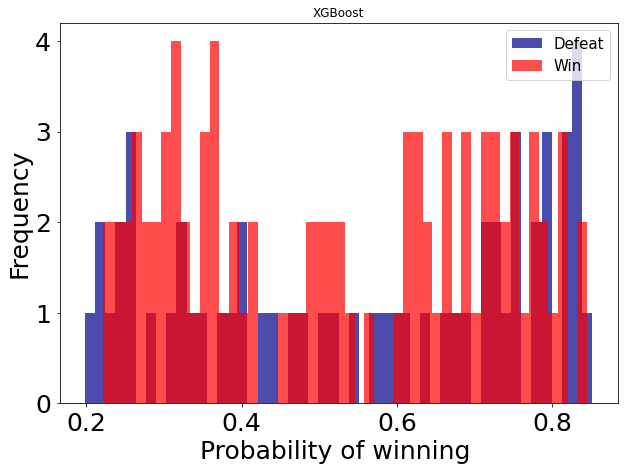

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==0], bins=50, label='Defeat', color='darkblue', alpha=0.7, histtype='stepfilled',)
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==1], bins=50, label='Win', alpha=0.7, color='red', histtype='stepfilled')
plt.xlabel('Probability of winning ', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title("XGBoost")
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.savefig('xgboost.png')

### Plot labels

In [27]:
y_labels = xgb_model.predict(X_test)
y_labels = pd.Series(y_labels)
y_test = y_test.astype('int32')
y_test = y_test.reset_index(drop=True)
y_labels = y_labels.reset_index(drop=True)
plott = [y_test, y_labels]

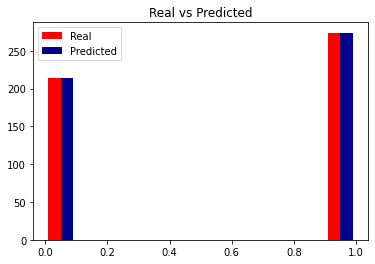

In [28]:
#Plot Real vs Predict
colors = ['red', 'darkblue']
labels = ['Real', 'Predicted']

plt.hist(plott, label=labels, color=colors, histtype='bar')
plt.title("Real vs Predicted")
plt.legend(loc='best')
plt.show()

In [29]:
# predicted labels vs real
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = y_labels

In [30]:
base

,actual,predictions
0,1,0
1,0,1
2,0,1
3,1,1
4,0,1
...,...,...
483,1,1
484,1,0
485,1,1
486,0,0


In [31]:
base.groupby(['actual']).size()

actual
0    214
1    274
dtype: int64

In [32]:
base.groupby(['predictions']).size()

predictions
0    214
1    274
dtype: int64

## Random forest

In [44]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# define RandomForestClassifier
rf = RandomForestClassifier()

# final model
rnd_forest = RandomForestClassifier(n_estimators = 300, min_samples_split = 6, min_samples_leaf= 4, max_features = 'auto', max_depth= 10, bootstrap=True) 
rnd_forest.fit(X_train, y_train) 

# calculate predictions
y_train_pred = rnd_forest.predict_proba(X_train)[:,1]
y_test_pred = rnd_forest.predict_proba(X_test)[:,1]

# print the scores on training and testing set
print('Training set accuracy: {:.4f}'.format(rnd_forest.score(X_train, y_train)))
print('Test set accuracy: {:.4f}'.format(rnd_forest.score(X_test, y_test)))
print('Training set AUC: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
print('Test set AUC: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))

y_oot_pred = rnd_forest.predict_proba(X_oot)[:,1]

print('Out of time accuracy: {:.4f}'.format(rnd_forest.score(X_oot, y_oot)))
print('Out of time set AUC: {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred)))

predictions_test = rnd_forest.predict(X_test)
predictions_oot_rf = rnd_forest.predict(X_oot)
predictions_oot_rf = pd.Series(predictions_oot_rf)

C:\Users\Rodzinka\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training set accuracy: 0.9639
Test set accuracy: 0.7234
Training set AUC: 0.9962
Test set AUC: 0.7696
Out of time accuracy: 0.7029
Out of time set AUC: 0.7745


In [45]:
bets = pd.read_csv('bets2.csv', sep = ';')

In [46]:
from sklearn import metrics

y_is_result = rnd_forest.predict(X_train)
y_oos_result = rnd_forest.predict(X_test)
y_oot_result = rnd_forest.predict(X_oot)

print('In sample precision: {:.4f}'.format(metrics.precision_score(y_train, y_is_result)))
print('In sample set recall: {:.4f}'.format(metrics.recall_score(y_train, y_is_result)))
print('In sample f1 score: {:.4f}'.format(metrics.f1_score(y_train, y_is_result)))

print('Out of sample precision: {:.4f}'.format(metrics.precision_score(y_test, y_oos_result)))
print('Out of sample set recall: {:.4f}'.format(metrics.recall_score(y_test, y_oos_result)))
print('Out of sample f1 score: {:.4f}'.format(metrics.f1_score(y_test, y_oos_result)))


print('Out of time precision: {:.4f}'.format(metrics.precision_score(y_oot, y_oot_result)))
print('Out of time set recall: {:.4f}'.format(metrics.recall_score(y_oot, y_oot_result)))
print('Out of time f1 score: {:.4f}'.format(metrics.f1_score(y_oot, y_oot_result)))

In sample precision: 0.9593
In sample set recall: 0.9736
In sample f1 score: 0.9664
Out of sample precision: 0.7565
Out of sample set recall: 0.7482
Out of sample f1 score: 0.7523
Out of time precision: 0.7083
Out of time set recall: 0.7391
Out of time f1 score: 0.7234


### Histograms

In [47]:
y_pred_test_all = rnd_forest.predict_proba(X_test)[:, 1]
pred = pd.DataFrame(y_pred_test_all, columns = ['win'])
df_plot1 = pd.concat([pred, y_test], axis=1)

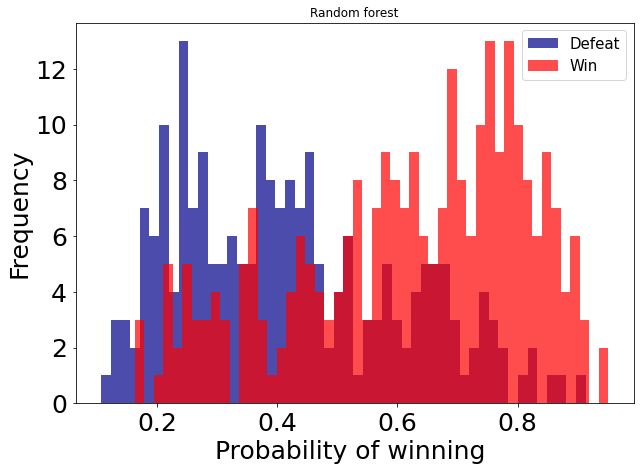

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==0], bins=50, label='Defeat', color='darkblue', alpha=0.7, histtype='stepfilled',)
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==1], bins=50, label='Win', alpha=0.7, color='red', histtype='stepfilled')
plt.xlabel('Probability of winning ', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title("Random forest")
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.savefig('Random_forest.png')

### Plot labels

In [35]:
y_labels = rnd_forest.predict(X_test)
plott = [y_test, y_labels]

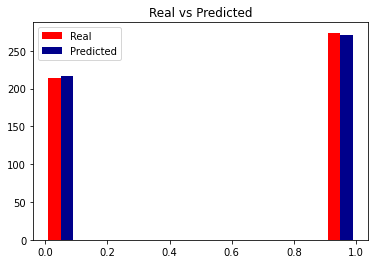

In [36]:
#Plot Real vs Predict
colors = ['red', 'darkblue']
labels = ['Real', 'Predicted']

plt.hist(plott, label=labels, color=colors, histtype='bar')
plt.title("Real vs Predicted")
plt.legend(loc='best')
plt.show()

## Decision trees

In [37]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import sklearn
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

# best model used for testing data
dt_final = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=100)

# fit the final model
dt_final.fit(X_train, y_train)

# calculate predictions
y_train_pred = dt_final.predict_proba(X_train)[:,1]
y_test_pred = dt_final.predict_proba(X_test)[:,1]

# print the scores on training and testing set
print('Training set accuracy: {:.4f}'.format(dt_final.score(X_train, y_train)))
print('Test set accuracy: {:.4f}'.format(dt_final.score(X_test, y_test)))
print('Training set AUC: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
print('Test set AUC: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))
y_oot_pred = dt_final.predict_proba(X_oot)[:,1]
print('Out of time accuracy: {:.4f}'.format(dt_final.score(X_oot, y_oot)))
print('Out of time set AUC: {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred)))

predictions_test = dt_final.predict(X_test)
predictions_oot_dt = dt_final.predict(X_oot)
predictions_oot_dt = pd.Series(predictions_oot_dt)

Training set accuracy: 0.7157
Test set accuracy: 0.7172
Training set AUC: 0.7886
Test set AUC: 0.7545
Out of time accuracy: 0.7486
Out of time set AUC: 0.7801


In [38]:
from sklearn import metrics

y_is_result = dt_final.predict(X_train)
y_oos_result = dt_final.predict(X_test)
y_oot_result = dt_final.predict(X_oot)

print('In sample precision: {:.4f}'.format(metrics.precision_score(y_train, y_is_result)))
print('In sample set recall: {:.4f}'.format(metrics.recall_score(y_train, y_is_result)))
print('In sample f1 score: {:.4f}'.format(metrics.f1_score(y_train, y_is_result)))

print('Out of sample precision: {:.4f}'.format(metrics.precision_score(y_test, y_oos_result)))
print('Out of sample set recall: {:.4f}'.format(metrics.recall_score(y_test, y_oos_result)))
print('Out of sample f1 score: {:.4f}'.format(metrics.f1_score(y_test, y_oos_result)))


print('Out of time precision: {:.4f}'.format(metrics.precision_score(y_oot, y_oot_result)))
print('Out of time set recall: {:.4f}'.format(metrics.recall_score(y_oot, y_oot_result)))
print('Out of time f1 score: {:.4f}'.format(metrics.f1_score(y_oot, y_oot_result)))

In sample precision: 0.7382
In sample set recall: 0.7223
In sample f1 score: 0.7302
Out of sample precision: 0.7595
Out of sample set recall: 0.7263
Out of sample f1 score: 0.7425
Out of time precision: 0.7500
Out of time set recall: 0.7826
Out of time f1 score: 0.7660


In [39]:
bets = pd.read_csv('bets2.csv', sep = ';')

## Histograms

In [40]:
y_pred_test_all = dt_final.predict_proba(X_test)[:, 1]
pred = pd.DataFrame(y_pred_test_all, columns = ['win'])
df_plot1 = pd.concat([pred, y_test], axis=1)

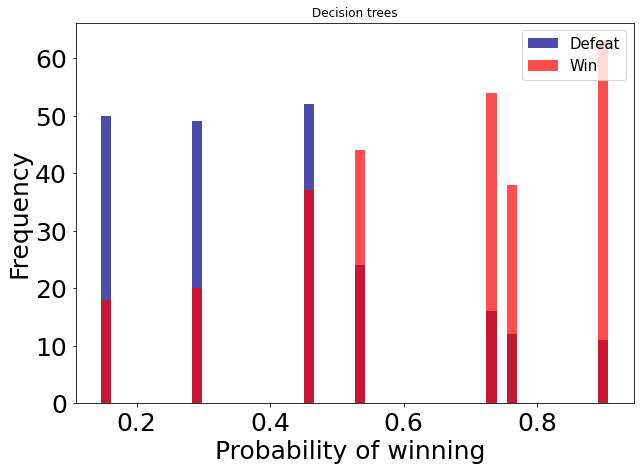

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==0], bins=50, label='Defeat', color='darkblue', alpha=0.7, histtype='stepfilled',)
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==1], bins=50, label='Win', alpha=0.7, color='red', histtype='stepfilled')
plt.xlabel('Probability of winning ', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title("Decision trees")
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.savefig('Decision_trees.png')

In [42]:
y_labels = dt_final.predict(X_test)
plott = [y_test, y_labels]

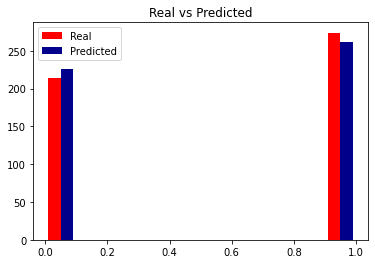

In [43]:
#Plot Real vs Predict
colors = ['red', 'darkblue']
labels = ['Real', 'Predicted']

plt.hist(plott, label=labels, color=colors, histtype='bar')
plt.title("Real vs Predicted")
plt.legend(loc='best')
plt.show()

## Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import roc_auc_score

# create GBM model
ab_clf = AdaBoostClassifier(random_state=30)

parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ab_clf, parameters, cv=5, verbose=1, n_jobs=1)
clf.fit(X_train, y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

# print scores on training and test set
print('In sample set score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Out of sample set score: {:.3f}'.format(clf.score(X_test, y_test)))
print('In sample set auc: {:.3f}'.format(roc_auc_train))
print('Out of sample set auc: {:.3f}'.format(roc_auc_test))

y_oot_pred = clf.predict_proba(X_oot)[:,1]

print('Out of time accuracy: {:.4f}'.format(clf.score(X_oot, y_oot)))
print('Out of time set AUC: {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred)))

predictions_test = clf.predict(X_test)
predictions_oot_ada = clf.predict(X_oot)
predictions_oot_ada = pd.Series(predictions_oot_ada)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
In sample set score: 0.718
Out of sample set score: 0.711
In sample set auc: 0.756
Out of sample set auc: 0.744
Out of time accuracy: 0.7486
Out of time set AUC: 0.7672


In [50]:
clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=6,
                   random_state=30)

In [51]:
bets = pd.read_csv('bets2.csv', sep = ';')

In [52]:
from sklearn import metrics

y_is_result = clf.predict(X_train)
y_oos_result = clf.predict(X_test)
y_oot_result = clf.predict(X_oot)

print('In sample precision: {:.4f}'.format(metrics.precision_score(y_train, y_is_result)))
print('In sample set recall: {:.4f}'.format(metrics.recall_score(y_train, y_is_result)))
print('In sample f1 score: {:.4f}'.format(metrics.f1_score(y_train, y_is_result)))

print('Out of sample precision: {:.4f}'.format(metrics.precision_score(y_test, y_oos_result)))
print('Out of sample set recall: {:.4f}'.format(metrics.recall_score(y_test, y_oos_result)))
print('Out of sample f1 score: {:.4f}'.format(metrics.f1_score(y_test, y_oos_result)))


print('Out of time precision: {:.4f}'.format(metrics.precision_score(y_oot, y_oot_result)))
print('Out of time set recall: {:.4f}'.format(metrics.recall_score(y_oot, y_oot_result)))
print('Out of time f1 score: {:.4f}'.format(metrics.f1_score(y_oot, y_oot_result)))

In sample precision: 0.7363
In sample set recall: 0.7339
In sample f1 score: 0.7351
Out of sample precision: 0.7548
Out of sample set recall: 0.7190
Out of sample f1 score: 0.7364
Out of time precision: 0.7500
Out of time set recall: 0.7826
Out of time f1 score: 0.7660


Confusion matrix, without normalization
[[59 24]
 [20 72]]
Normalized confusion matrix
[[0.71 0.29]
 [0.22 0.78]]


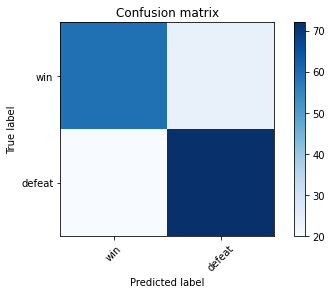

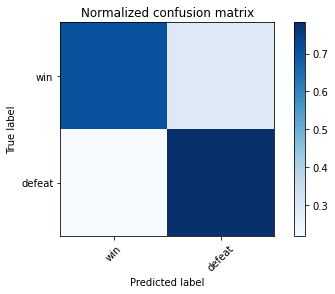

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['win', 'defeat'], rotation=45)
    plt.yticks(tick_marks, ['win', 'defeat'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y_oot, y_oot_result)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

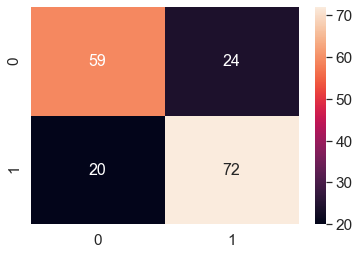

In [49]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_oot, y_oot_result)
df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

### Histograms

In [53]:
y_pred_test_all = clf.predict_proba(X_test)[:, 1]
pred = pd.DataFrame(y_pred_test_all, columns = ['win'])
df_plot1 = pd.concat([pred, y_test], axis=1)

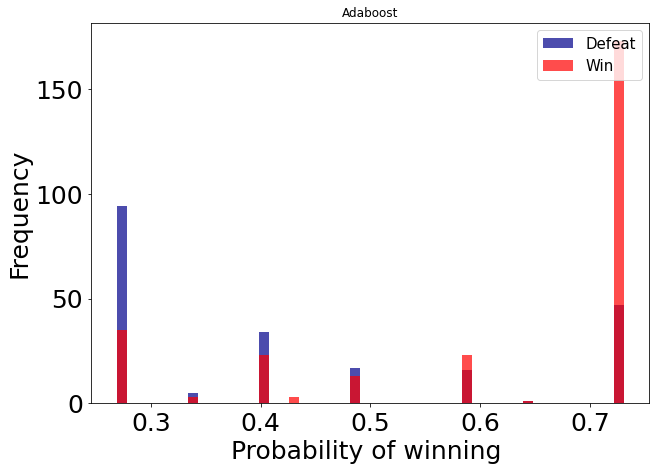

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==0], bins=50, label='Defeat', color='darkblue', alpha=0.7, histtype='stepfilled',)
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==1], bins=50, label='Win', alpha=0.7, color='red', histtype='stepfilled')
plt.xlabel('Probability of winning ', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title("Adaboost")
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.savefig('Adaboost.png')

In [52]:
y_labels = clf.predict(X_test)
plott = [y_test, y_labels]

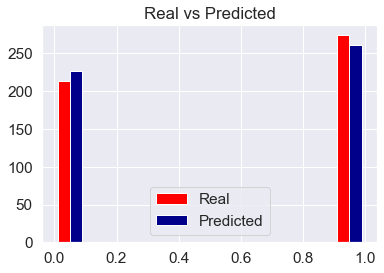

In [53]:
#Plot Real vs Predict
colors = ['red', 'darkblue']
labels = ['Real', 'Predicted']

plt.hist(plott, label=labels, color=colors, histtype='bar')
plt.title("Real vs Predicted")
plt.legend(loc='best')
plt.show()

## Neural nets

In [92]:
import random
import numpy as np
import tensorflow as tf
random.seed(22)
np.random.seed(22)
tf.random.set_seed(22)

from keras import metrics
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.optimizers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

metrics = ['accuracy']

epochs = [30]

learning_rate = [0.01]

dropout = [0.2]

activation_final = ['sigmoid']

activation = ['relu',]

optimizer = [Adam]

parameters0 = dict(metrics = metrics,
                  epochs = epochs,
                  dropout = dropout,
                  learning_rate = learning_rate,
                  activation = activation,
                  activation_final = activation_final,
                  optimizer = optimizer)

def build_model0(activation, dropout, activation_final, learning_rate, epochs,
                optimizer, metrics):
    model = Sequential([
      layers.Dense(276, activation=activation),
      layers.Dropout(dropout),
      layers.Dense(276, activation=activation),
      layers.Dropout(dropout),
      layers.Dense(276, activation=activation),
      layers.Dense(1, name="outputs", activation=activation_final),

    ])
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(lr=learning_rate),
                  metrics=metrics)
    return model

model_GridSearch0 = KerasClassifier(build_fn=build_model0, verbose=1)
nn = GridSearchCV(estimator=model_GridSearch0, param_grid=parameters0, n_jobs=1, cv=3, verbose = 1)

nn_result = nn.fit(X_train, y_train)

# final model
model = Sequential([
  layers.Dense(276, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(276, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(276, activation='relu'),
  layers.Dense(1, name="outputs", activation='sigmoid'),

])
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics='accuracy')

model.fit(X_train, y_train, epochs=30)

# calculate predictions
y_train_pred= nn_result.predict_proba(X_train)
y_test_pred = nn_result.predict_proba(X_test)
y_test_pred

# print scores on training and testing set
print('Training set accuracy: {:.4f}'.format(model.evaluate(X_train, y_train)[1]))
print('Test set accuracy: {:.4f}'.format(model.evaluate(X_test, y_test)[1]))
print('Training set AUC: {:.4f}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
print('Test set AUC: {:.4f}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

y_oot_pred = nn_result.predict_proba(X_oot)

print('Oot set accuracy: {:.4f}'.format(model.evaluate(X_oot, y_oot)[1]))
print('Oot set AUC: {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred[:,1])))

y_pred_test_all = model.predict(X_test)

predictions_test = nn_result.predict_proba(X_test)
predictions_oot_nn = nn_result.predict(X_oot)
predictions_oot_nn = np.concatenate(predictions_oot_nn, axis=0 )
predictions_oot_nn = pd.Series(predictions_oot_nn)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Epoch 1/30


<ipython-input-92-a5fc9b928664>:54: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_GridSearch0 = KerasClassifier(build_fn=build_model0, verbose=1)
C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: 119.2923 - accuracy: 0.5125
Epoch 2/30
24/24 [==============================] - 0s 2ms/step - loss: 1.0510 - accuracy: 0.5469
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 0.7329 - accuracy: 0.5641
Epoch 4/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6262
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6486
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6222
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6843
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6499
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6658
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.6671
Epoch 11/30
24/24 [=========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: 100.1489 - accuracy: 0.5258
Epoch 2/30
24/24 [==============================] - 0s 2ms/step - loss: 1.0924 - accuracy: 0.5403
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 0.8068 - accuracy: 0.5892
Epoch 4/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5892
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.6513
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6592
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.6711
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.6605
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.6790
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.6803
Epoch 11/30
24/24 [=========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: 76.1577 - accuracy: 0.5158
Epoch 2/30
24/24 [==============================] - 0s 2ms/step - loss: 1.1232 - accuracy: 0.5475
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6491
Epoch 4/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6135
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6214
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.6649
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.6702
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6662
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6728
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6953
Epoch 11/30
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


36/36 [==============================] - 0s 2ms/step - loss: 50.1577 - accuracy: 0.5053
Epoch 2/30
36/36 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.5669
Epoch 3/30
36/36 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6197
Epoch 4/30
36/36 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.6400
Epoch 5/30
36/36 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6391
Epoch 6/30
36/36 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6294
Epoch 7/30
36/36 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.6444
Epoch 8/30
36/36 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6796
Epoch 9/30
36/36 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6664
Epoch 10/30
36/36 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6646
Epoch 11/30
36/36 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


36/36 [==============================] - 0s 2ms/step - loss: 17.9075 - accuracy: 0.5423
Epoch 2/30
36/36 [==============================] - 0s 2ms/step - loss: 4.8348 - accuracy: 0.5713
Epoch 3/30
36/36 [==============================] - 0s 2ms/step - loss: 2.9769 - accuracy: 0.5792
Epoch 4/30
36/36 [==============================] - 0s 2ms/step - loss: 2.3155 - accuracy: 0.5687
Epoch 5/30
36/36 [==============================] - 0s 2ms/step - loss: 1.6940 - accuracy: 0.5942
Epoch 6/30
36/36 [==============================] - 0s 2ms/step - loss: 1.4749 - accuracy: 0.5942
Epoch 7/30
36/36 [==============================] - 0s 2ms/step - loss: 1.1977 - accuracy: 0.6118
Epoch 8/30
36/36 [==============================] - 0s 2ms/step - loss: 1.1351 - accuracy: 0.5977
Epoch 9/30
36/36 [==============================] - 0s 2ms/step - loss: 0.9389 - accuracy: 0.6294
Epoch 10/30
36/36 [==============================] - 0s 2ms/step - loss: 0.8582 - accuracy: 0.6144
Epoch 11/30
36/36 [==========

In [55]:
bets = pd.read_csv('bets2.csv', sep = ';')

In [56]:
from sklearn import metrics

y_is_result = nn_result.predict(X_train)
y_oos_result = nn_result.predict(X_test)
y_oot_result = nn_result.predict(X_oot)

print('In sample precision: {:.4f}'.format(metrics.precision_score(y_train, y_is_result)))
print('In sample set recall: {:.4f}'.format(metrics.recall_score(y_train, y_is_result)))
print('In sample f1 score: {:.4f}'.format(metrics.f1_score(y_train, y_is_result)))

print('Out of sample precision: {:.4f}'.format(metrics.precision_score(y_test, y_oos_result)))
print('Out of sample set recall: {:.4f}'.format(metrics.recall_score(y_test, y_oos_result)))
print('Out of sample f1 score: {:.4f}'.format(metrics.f1_score(y_test, y_oos_result)))


print('Out of time precision: {:.4f}'.format(metrics.precision_score(y_oot, y_oot_result)))
print('Out of time set recall: {:.4f}'.format(metrics.recall_score(y_oot, y_oot_result)))
print('Out of time f1 score: {:.4f}'.format(metrics.f1_score(y_oot, y_oot_result)))

6/6 [==============================] - 0s 1ms/step
In sample precision: 0.6885
In sample set recall: 0.7455
In sample f1 score: 0.7159
Out of sample precision: 0.7250
Out of sample set recall: 0.7409
Out of sample f1 score: 0.7329
Out of time precision: 0.7000
Out of time set recall: 0.7609
Out of time f1 score: 0.7292


### Histograms

In [57]:
y_pred_test_all = nn_result.predict_proba(X_test)[:, 1]
pred = pd.DataFrame(y_pred_test_all, columns = ['win'])
df_plot1 = pd.concat([pred, y_test], axis=1)

16/16 [==============================] - 0s 885us/step


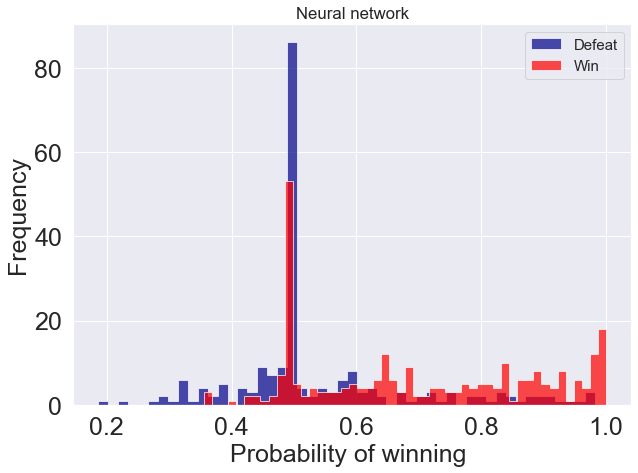

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==0], bins=50, label='Defeat', color='darkblue', alpha=0.7, histtype='stepfilled',)
plt.hist(df_plot1.iloc[:, 0][df_plot1.iloc[:, 1]==1], bins=50, label='Win', alpha=0.7, color='red', histtype='stepfilled')
plt.xlabel('Probability of winning ', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title("Neural network")
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.savefig('Neural_network.png')

In [59]:
y_labels = nn_result.predict(X_test)
plott = [y_test, np.concatenate(y_labels, axis=0 )]

16/16 [==============================] - 0s 860us/step


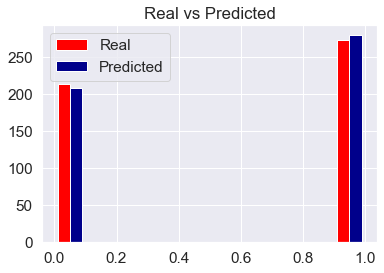

In [60]:
#Plot Real vs Predict
colors = ['red', 'darkblue']
labels = ['Real', 'Predicted']

plt.hist(plott, label=labels, color=colors, histtype='bar')
plt.title("Real vs Predicted")
plt.legend(loc='best')
plt.show()

In [61]:
df_plot5

NameError: name 'df_plot5' is not defined

In [ ]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

In [ ]:
Most_Common(df_plot5.iloc[:, 0])

In [ ]:
Most_Common(df_plot5.iloc[:, 1])

In [62]:
y_pred_test_ada = clf.predict_proba(X_test)[:,1]
y_pred_test_xgb = xgb_model.predict_proba(X_test)[:,1]
y_pred_test_nn = nn_result.predict_proba(X_test)[:,1]
y_pred_test_rf = rnd_forest.predict_proba(X_test)[:,1]
y_pred_test_dt = dt_final.predict_proba(X_test)[:,1]




16/16 [==============================] - 0s 864us/step


In [63]:
fpr_ts_ada

NameError: name 'fpr_ts_ada' is not defined

In [64]:
tpr_ts_ada

NameError: name 'tpr_ts_ada' is not defined

In [72]:
#test data ROC
fpr_ts_ada, tpr_ts_ada, threshold = roc_curve(y_test, y_pred_test_ada)
roc_auc_test_ada = auc(fpr_ts_ada, tpr_ts_ada)

fpr_ts_xgb, tpr_ts_xgb, threshold = roc_curve(y_test, y_pred_test_xgb)
roc_auc_test_xgb = auc(fpr_ts_xgb, tpr_ts_xgb)

fpr_ts_nn, tpr_ts_nn, threshold = roc_curve(y_test, y_pred_test_nn)
roc_auc_test_nn = auc(fpr_ts_nn, tpr_ts_nn)

fpr_ts_rf, tpr_ts_rf, threshold = roc_curve(y_test, y_pred_test_rf)
roc_auc_test_rf = auc(fpr_ts_rf, tpr_ts_rf)

fpr_ts_dt, tpr_ts_dt, threshold = roc_curve(y_test, y_pred_test_dt)
roc_auc_test_dt = auc(fpr_ts_dt, tpr_ts_dt)

<ipython-input-73-2a6a2ee054b1>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color = 'black')


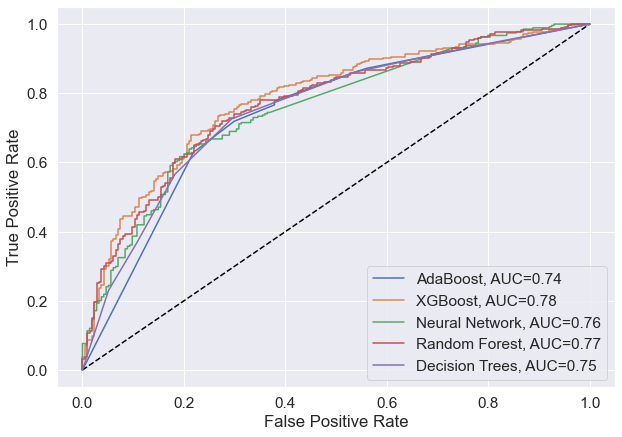

In [73]:
#set up plotting area
plt.figure(figsize=(10,7))

plt.plot(fpr_ts_ada,tpr_ts_ada,label="AdaBoost, AUC="+str(np.round(roc_auc_test_ada, 2)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color = 'black')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#add legend

plt.plot(fpr_ts_xgb,tpr_ts_xgb,label="XGBoost, AUC="+str(np.round(roc_auc_test_xgb, 2)))

plt.plot(fpr_ts_nn,tpr_ts_nn,label="Neural Network, AUC="+str(np.round(roc_auc_test_nn, 2)))

plt.plot(fpr_ts_rf,tpr_ts_rf,label="Random Forest, AUC="+str(np.round(roc_auc_test_rf, 2)))

plt.plot(fpr_ts_dt,tpr_ts_dt,label="Decision Trees, AUC="+str(np.round(roc_auc_test_dt, 2)))

plt.legend()

In [74]:
from sklearn.metrics import precision_recall_curve

fpr_ts_ada, tpr_ts_ada, threshold = precision_recall_curve(y_test, y_pred_test_ada)

fpr_ts_xgb, tpr_ts_xgb, threshold = precision_recall_curve(y_test, y_pred_test_xgb)

fpr_ts_nn, tpr_ts_nn, threshold = precision_recall_curve(y_test, y_pred_test_nn)

fpr_ts_rf, tpr_ts_rf, threshold = precision_recall_curve(y_test, y_pred_test_rf)

fpr_ts_dt, tpr_ts_dt, threshold = precision_recall_curve(y_test, y_pred_test_dt)


In [78]:
threshold

array([0.15, 0.29, 0.46, 0.53, 0.74, 0.76, 0.91])

<ipython-input-85-03a7c417e35d>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0.5, 0.5],'r--', color = 'black')


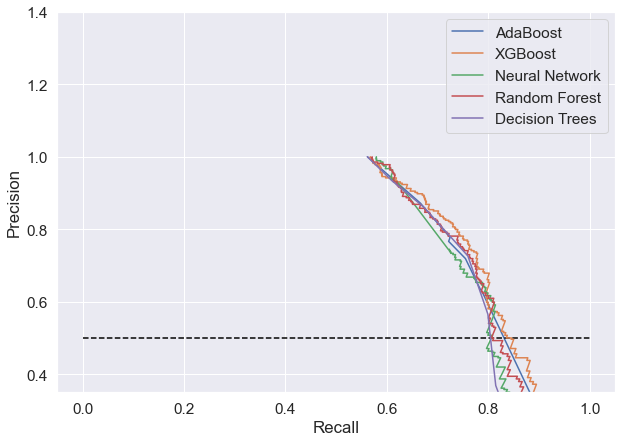

In [85]:
#set up plotting area
plt.figure(figsize=(10,7))

plt.plot(fpr_ts_ada,tpr_ts_ada,label="AdaBoost")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0.5, 0.5],'r--', color = 'black')
plt.ylabel('Precision')
plt.xlabel('Recall')
#add legend

plt.plot(fpr_ts_xgb,tpr_ts_xgb,label="XGBoost")

plt.plot(fpr_ts_nn,tpr_ts_nn,label="Neural Network")

plt.plot(fpr_ts_rf,tpr_ts_rf,label="Random Forest")

plt.plot(fpr_ts_dt,tpr_ts_dt,label="Decision Trees")

plt.ylim(0.35,1.4)

plt.legend()

Text(0.5, 1.0, '')

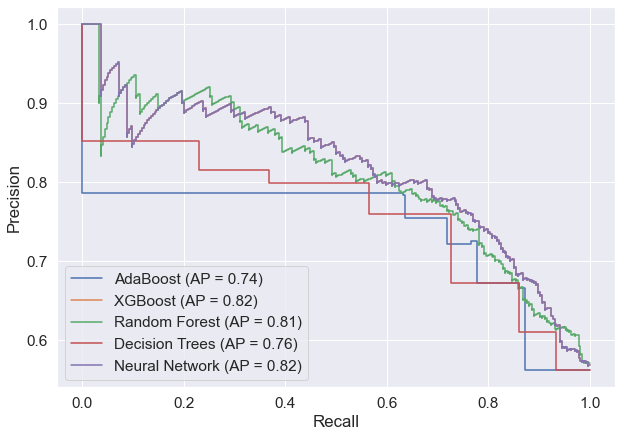

In [101]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plot_precision_recall_curve(clf, X_test, y_test, ax = plt.gca(),name = "AdaBoost")

plot_precision_recall_curve(xgb_model, X_test, y_test, ax = plt.gca(),name = "XGBoost")

plot_precision_recall_curve(rnd_forest, X_test, y_test, ax = plt.gca(),name = "Random Forest")

plot_precision_recall_curve(dt_final, X_test, y_test, ax = plt.gca(),name = "Decision Trees")

plot_precision_recall_curve(xgb_model, X_test, y_test, ax = plt.gca(),name = "Neural Network")

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('')